## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [165]:
data.isnull().sum()

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [167]:
data.shape

(344, 11)

In [443]:
data_clean = data.dropna()

In [445]:
data_clean.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [447]:
data_clean

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


In [449]:
from sklearn.preprocessing import OrdinalEncoder

In [451]:
enc = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])

In [453]:
data_clean['Species'] = enc.fit_transform(data_clean[['Species']])

/var/folders/wh/1qsy29_n4q55x1rtqhv9hfbr0000gn/T/ipykernel_82124/778612333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Species'] = enc.fit_transform(data_clean[['Species']])


In [455]:
data_dum = pd.get_dummies(data_clean, drop_first=True)

In [457]:
data_dum

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0.0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,False,True
1,0.0,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,True,False
2,1.0,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,True,False
3,0.0,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,True,False
4,1.0,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,True,True,False
340,2.0,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True,False,True
341,2.0,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,True,True,False
342,1.0,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,True,True,False


In [459]:
y = data_dum['Species']

In [461]:
X = data_dum.drop('Species', axis=1)

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [854]:
from sklearn.model_selection import train_test_split

In [856]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Ваажно использовать stratify чтобы сохранить баланс классов

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [858]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [860]:
X_length_and_mass_train = X_train[['Flipper Length (mm)', 'Body Mass (g)']]

In [862]:
X_length_and_mass_test = X_test[['Flipper Length (mm)', 'Body Mass (g)']]

In [864]:
normalizer = preprocessing.StandardScaler()

sub_train = normalizer.fit_transform(X_length_and_mass_train)
sub_test = normalizer.fit_transform(X_length_and_mass_test)

X_length_and_mas_scaled_train = pd.DataFrame(data=sub_train, columns=X_length_and_mass_train.columns)
X_length_and_mas_scaled_test = pd.DataFrame(data=sub_test, columns=X_length_and_mass_test.columns)

In [866]:
X_length_and_mas_scaled_train

,Flipper Length (mm),Body Mass (g)
0,2.053168,1.594807
1,1.335807,1.161175
2,-1.031482,-0.635303
3,2.053168,1.966492
4,-0.242386,0.231962
...,...,...
222,2.053168,2.028440
223,-0.672802,-0.883093
224,-0.242386,-0.635303
225,-1.174954,-0.759198


In [868]:
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    clf.fit(X_length_and_mas_scaled_train, y_train)
    
    y_pred_train = clf.predict(X_length_and_mas_scaled_train)
    y_pred_test = clf.predict(X_length_and_mas_scaled_test)
    
    print(f"Accuracy for {k} neighbors on Train set is: ", np.round(np.mean(y_train == y_pred_train), 2))
    print(f"Accuracy for {k} neighbors on Test set is: ", np.round(np.mean(y_test == y_pred_test), 2))
    print()

Accuracy for 1 neighbors on Train set is:  0.97
Accuracy for 1 neighbors on Test set is:  0.79

Accuracy for 3 neighbors on Train set is:  0.86
Accuracy for 3 neighbors on Test set is:  0.76

Accuracy for 5 neighbors on Train set is:  0.83
Accuracy for 5 neighbors on Test set is:  0.78

Accuracy for 10 neighbors on Train set is:  0.82
Accuracy for 10 neighbors on Test set is:  0.8

Accuracy for 15 neighbors on Train set is:  0.81
Accuracy for 15 neighbors on Test set is:  0.77

Accuracy for 25 neighbors on Train set is:  0.79
Accuracy for 25 neighbors on Test set is:  0.86



### ПРИМЕР ВЫВОДА ###
NN	Train	Test
1	0.97	0.74
3	0.86	0.76
5	0.83	0.78
10	0.82	0.78
15	0.81	0.76
25	0.79	0.84


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [610]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 417.2 kB/s eta 0:00:00a 0:00:01


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [612]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [622]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [666]:
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: 

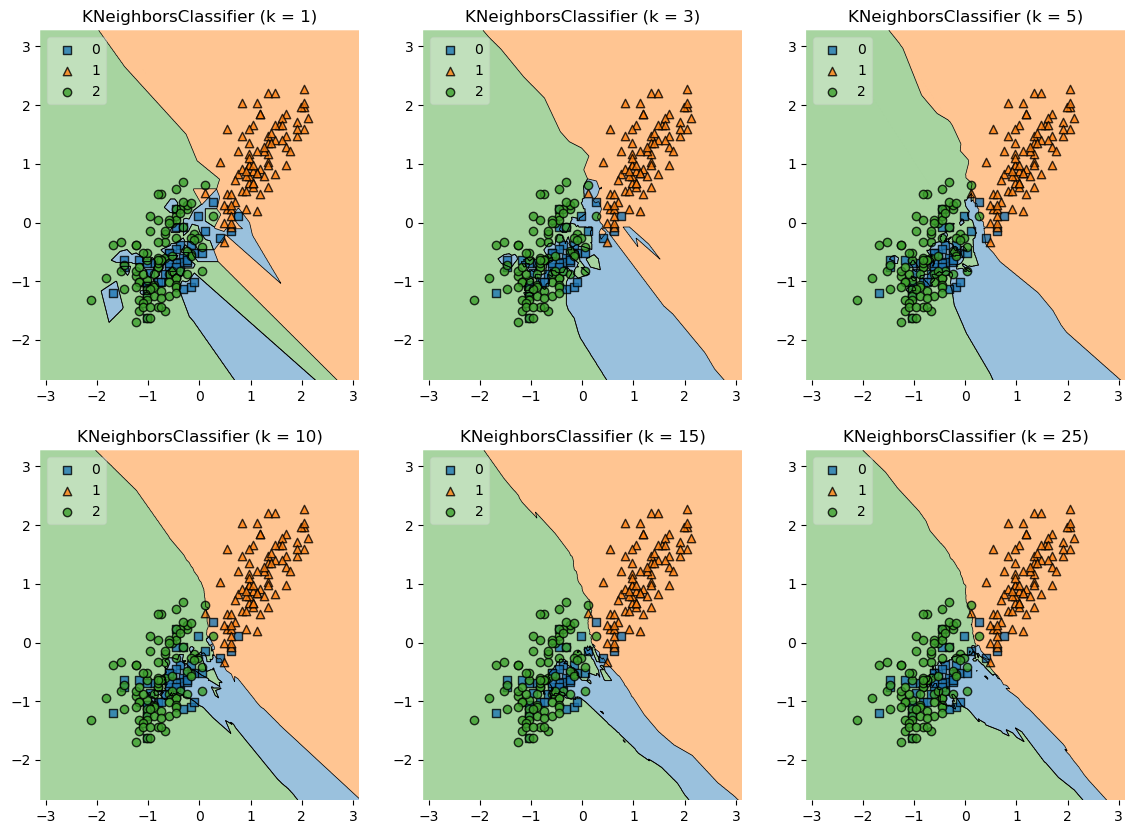

In [668]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(14,10))

labels = [
    'KNeighborsClassifier (k = 1)',
    'KNeighborsClassifier (k = 3)',
    'KNeighborsClassifier (k = 5)',
    'KNeighborsClassifier (k = 10)',
    'KNeighborsClassifier (k = 15)',
    'KNeighborsClassifier (k = 25)'
]

for classifier, lab, grd in zip([clf1, clf3, clf5, clf10, clf15, clf25],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    classifier.fit(X_length_and_mas_scaled_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_length_and_mas_scaled_train.to_numpy(), y=y_train.astype(int).to_numpy(), clf=classifier, legend=2)
    plt.title(lab)

plt.show()


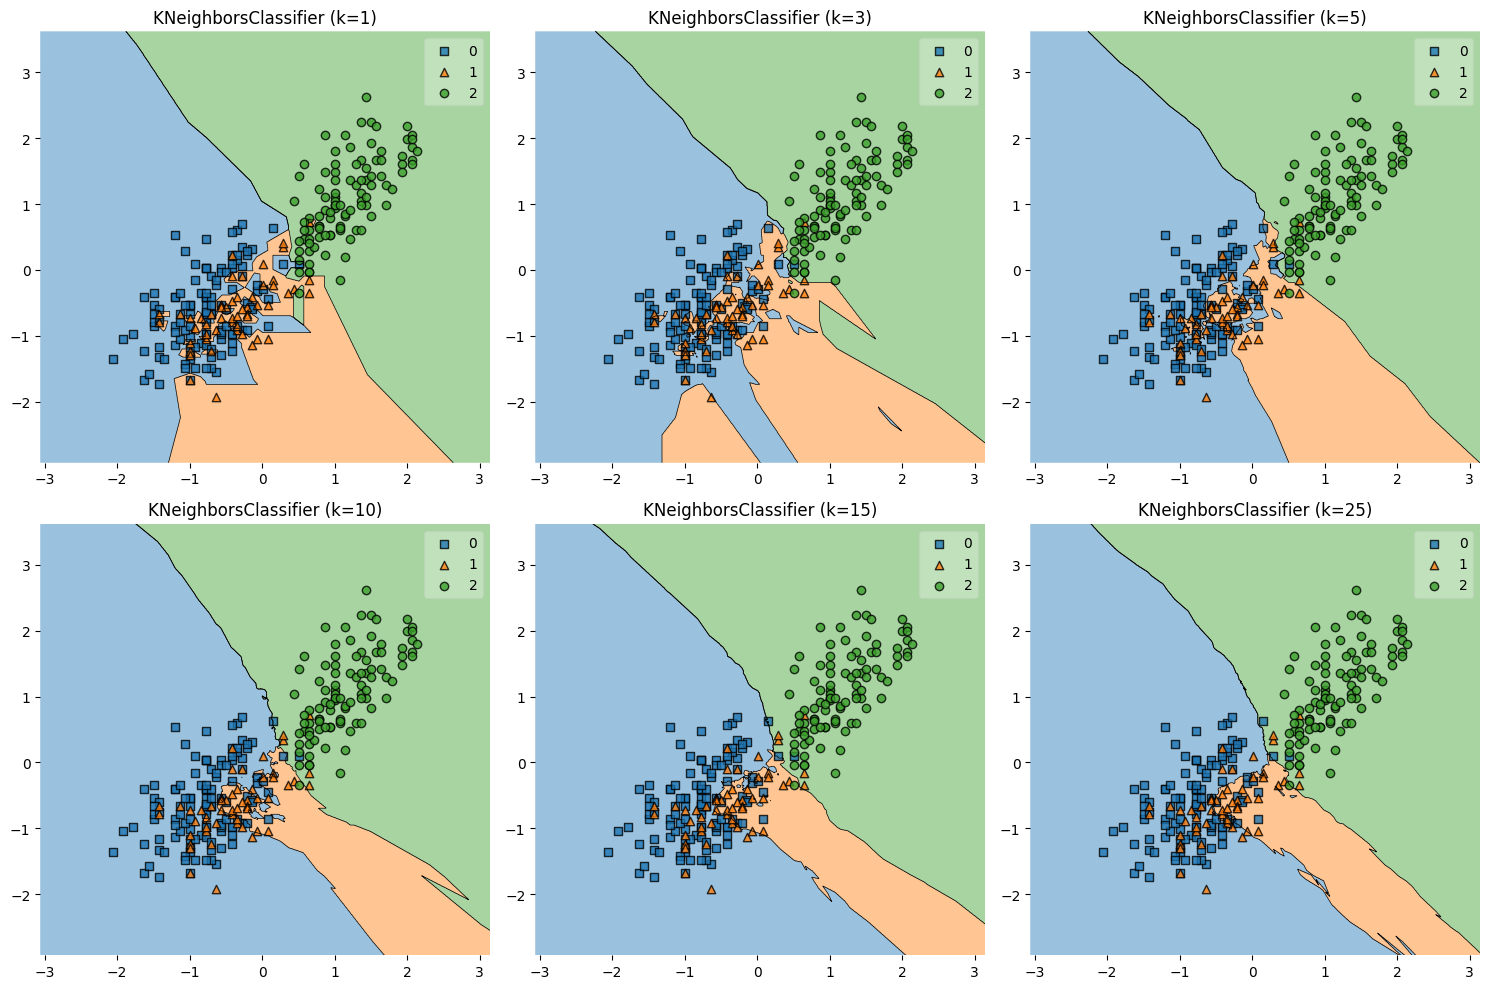

In [ ]:
# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

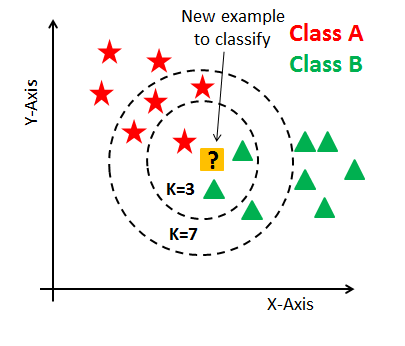

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [870]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

      # YOUR CODE HERE
      # (⌒_⌒;)


    def predict(self, X):

        X = np.array(X)
        predictions = []
        
        for i in X:
            distances = [self.count_distance(i, train_x) for train_x in self.X_train]
        
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]

            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
            
        return predictions

    # YOUR CODE HERE
    # (＠_＠)
        


    def count_distance(self, x, y):

        return np.sqrt(np.sum((x - y) ** 2))

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ


In [824]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
    
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1, 0]


In [826]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [880]:
for i in range(1, 11):
    knn = KNN(k = i)
    
    knn.fit(X_length_and_mas_scaled_train, y_train)
    y_pred_train = knn.predict(X_length_and_mas_scaled_train)
    y_pred_test = knn.predict(X_length_and_mas_scaled_test)
    
    print(f"Accuracy for {i} neighbors on Train set is: ", np.round(np.mean(y_train == y_pred_train), 4))
    print(f"Accuracy for {i} neighbors on Test set is: ", np.round(np.mean(y_test == y_pred_test), 4))
    print()
    
    

Accuracy for 1 neighbors on Train set is:  0.9692
Accuracy for 1 neighbors on Test set is:  0.7755

Accuracy for 2 neighbors on Train set is:  0.9692
Accuracy for 2 neighbors on Test set is:  0.7755

Accuracy for 3 neighbors on Train set is:  0.8767
Accuracy for 3 neighbors on Test set is:  0.7551

Accuracy for 4 neighbors on Train set is:  0.8987
Accuracy for 4 neighbors on Test set is:  0.7347

Accuracy for 5 neighbors on Train set is:  0.8282
Accuracy for 5 neighbors on Test set is:  0.7755

Accuracy for 6 neighbors on Train set is:  0.8943
Accuracy for 6 neighbors on Test set is:  0.7653

Accuracy for 7 neighbors on Train set is:  0.8238
Accuracy for 7 neighbors on Test set is:  0.7857

Accuracy for 8 neighbors on Train set is:  0.8414
Accuracy for 8 neighbors on Test set is:  0.7857

Accuracy for 9 neighbors on Train set is:  0.8194
Accuracy for 9 neighbors on Test set is:  0.7755

Accuracy for 10 neighbors on Train set is:  0.8326
Accuracy for 10 neighbors on Test set is:  0.7755

Получилось что лучшее k: 2 с точностью 0.7755 на test.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [1108]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [1110]:
data = data.drop(['Unnamed: 0'], axis=1)

In [1112]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [1114]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [1116]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [1118]:
data.corr(numeric_only=True).style.background_gradient(cmap='seismic')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшую корреляцию с целевой переменной имеют признаки carat, x(length in mm), y(width in mm), z(depth in mm).

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [1120]:
data 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [1122]:
from sklearn.preprocessing import OrdinalEncoder

I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [1124]:
lbl_cut = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
lbl_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

data["cut"] = lbl_cut.fit_transform(data[["cut"]])
data["clarity"] = lbl_clarity.fit_transform(data[["clarity"]])

In [1126]:
data = pd.get_dummies(data, 'color', drop_first=True)

In [1128]:
data

,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4.0,1.0,61.5,55.0,326,3.95,3.98,2.43,True,False,False,False,False,False
1,0.21,3.0,2.0,59.8,61.0,326,3.89,3.84,2.31,True,False,False,False,False,False
2,0.23,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31,True,False,False,False,False,False
3,0.29,3.0,3.0,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,True,False
4,0.31,1.0,1.0,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,2.0,60.8,57.0,2757,5.75,5.76,3.50,False,False,False,False,False,False
53936,0.72,1.0,2.0,63.1,55.0,2757,5.69,5.75,3.61,False,False,False,False,False,False
53937,0.70,2.0,2.0,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,False,False,False
53938,0.86,3.0,1.0,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,True,False,False


Для cut и clarity разумнее применить OrdinalEncoder, так как есть четкая иерархия по категориям в каждом признаке и мы знаем ее, для color не знаем как расположены увета между худщим и лучшим, следовательно применяем get_dummies

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [1130]:
y = data["price"]
X = data.drop("price", axis=1)

In [1132]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0
)

In [1134]:
X_train.shape, y_train.shape

((37758, 14), (37758,))

In [1136]:
X_test.shape, y_test.shape

((16182, 14), (16182,))

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [1138]:
from sklearn.preprocessing import StandardScaler

In [1140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1142]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04
mean,-4.027124e-17,2.258200e-18,5.946594e-17,2.715486e-16,1.351909e-15,7.038058e-17,6.221342e-16,-7.452061e-17,2.465202e-17,-7.226241e-17,7.000421e-17,7.527334e-19,3.010934e-17,5.494954e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.260601e+00,-2.599117e+00,-1.848533e+00,-1.307535e+01,-6.472397e+00,-5.103314e+00,-4.965602e+00,-4.977120e+00,-4.705193e-01,-4.679142e-01,-5.116194e-01,-4.247118e-01,-3.353992e-01,-2.329185e-01
25%,-8.392639e-01,-8.096099e-01,-6.359602e-01,-4.569131e-01,-6.496383e-01,-9.097871e-01,-8.791912e-01,-8.851020e-01,-4.705193e-01,-4.679142e-01,-5.116194e-01,-4.247118e-01,-3.353992e-01,-2.329185e-01
50%,-2.072588e-01,8.514352e-02,-2.967365e-02,1.008080e-01,-2.017338e-01,-2.834518e-02,-2.208391e-02,-2.732499e-02,-4.705193e-01,-4.679142e-01,-5.116194e-01,-4.247118e-01,-3.353992e-01,-2.329185e-01
75%,5.090137e-01,9.798969e-01,5.766129e-01,5.190987e-01,6.940753e-01,7.195449e-01,6.965010e-01,7.038947e-01,-4.705193e-01,-4.679142e-01,-5.116194e-01,-4.247118e-01,-3.353992e-01,-2.329185e-01
max,8.872548e+00,9.798969e-01,2.395473e+00,1.202209e+01,9.652166e+00,4.458995e+00,4.602795e+01,3.973978e+01,2.125312e+00,2.137144e+00,1.954578e+00,2.354538e+00,2.981522e+00,4.293348e+00


Теперь, когда все признаки стандартизированы, у нас не будет слишком больших весов и модель будет лучше обучаться.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [1144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1146]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression()

In [1158]:
pd.DataFrame(clf_lr.coef_, index=X.columns).sort_values(0)


,0
x,-952.377989
color_J,-508.451297
color_I,-434.055866
color_H,-359.649420
color_G,-211.998935
depth,-119.289347
color_F,-114.585310
color_E,-78.364871
table,-67.043576
z,-21.901083


In [1160]:
y_pred = clf_lr.predict(X_test)

In [1162]:
print(f"Train: {mean_squared_error(y_train, clf_lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, y_pred)}")

Train: 1453732.189755485
Test: 1417773.4898166058


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [1164]:
pd.DataFrame(clf_lr.coef_, index=X.columns).sort_values(0)

,0
x,-952.377989
color_J,-508.451297
color_I,-434.055866
color_H,-359.649420
color_G,-211.998935
depth,-119.289347
color_F,-114.585310
color_E,-78.364871
table,-67.043576
z,-21.901083


Получилось что x length in mm отрицательное влияет на стоимость (коэффициент -952.377989), а сильнее всего повышает стоимость карат(вес 5097.196010).

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [1170]:
from sklearn.linear_model import Lasso, Ridge

In [1172]:
lasso = Lasso(10.0).fit(X_train, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test))}")

ridge = Ridge(10.0).fit(X_train, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test))}")

Lasso
Train: 1467699.331706013
Test: 1444108.140035274

Ridge
Train: 1453788.0435376735
Test: 1418594.348232032


In [1178]:
pd.DataFrame(lasso.coef_, index=X.columns).sort_values(0)

,0
x,-481.742164
color_J,-452.522655
color_I,-364.409456
color_H,-285.594001
color_G,-133.906896
depth,-82.518439
table,-51.812766
color_F,-43.659179
z,-27.687253
color_E,-5.980056


In [1180]:
pd.DataFrame(ridge.coef_, index=X.columns).sort_values(0)

,0
x,-913.509696
color_J,-507.347970
color_I,-432.847092
color_H,-358.739581
color_G,-211.413144
depth,-117.016163
color_F,-114.240437
color_E,-77.859800
table,-66.808237
z,-25.401597


In [1182]:
pd.DataFrame(clf_lr.coef_, index=X.columns).sort_values(0)

,0
x,-952.377989
color_J,-508.451297
color_I,-434.055866
color_H,-359.649420
color_G,-211.998935
depth,-119.289347
color_F,-114.585310
color_E,-78.364871
table,-67.043576
z,-21.901083


В Lasso зметно поменялся самый большой отрицательный вес, остальные приблизительно остались такими же, как в clf_lr

В Ridge получилось приблизительно то же самое

Предполагаю, что регуляризация не дала особых изменений, так как я использовал для двух категориальных признаков OrdinalEncoder, а там, где применил get_dummies, сделал drop_first

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [1195]:
for i in [0.1, 1, 10, 100, 200]:
    lasso = Lasso(i).fit(X_train, y_train)
    print(f"Lasso with hyperparameter = {i}")
    print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train))}")
    print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test))}")

    ridge = Ridge(i).fit(X_train, y_train)
    print(f"\nRidge with hyperparameter = {i}")
    print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train))}")
    print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test))}")
    print()

Lasso with hyperparameter = 0.1
Train: 1453734.0899627898
Test: 1417924.8307540119

Ridge with hyperparameter = 0.1
Train: 1453732.195484335
Test: 1417781.2918074802

Lasso with hyperparameter = 1
Train: 1453919.2961320644
Test: 1419403.0990819028

Ridge with hyperparameter = 1
Train: 1453732.7613088684
Test: 1417851.888149068

Lasso with hyperparameter = 10
Train: 1467699.331706013
Test: 1444108.140035274

Ridge with hyperparameter = 10
Train: 1453788.0435376735
Test: 1418594.348232032

Lasso with hyperparameter = 100
Train: 1621734.8621276785
Test: 1608138.3250963443

Ridge with hyperparameter = 100
Train: 1458262.0932310263
Test: 1428879.4827342217

Lasso with hyperparameter = 200
Train: 1873851.701140295
Test: 1859221.7188171092

Ridge with hyperparameter = 200
Train: 1468606.8774252166
Test: 1444107.0280826176



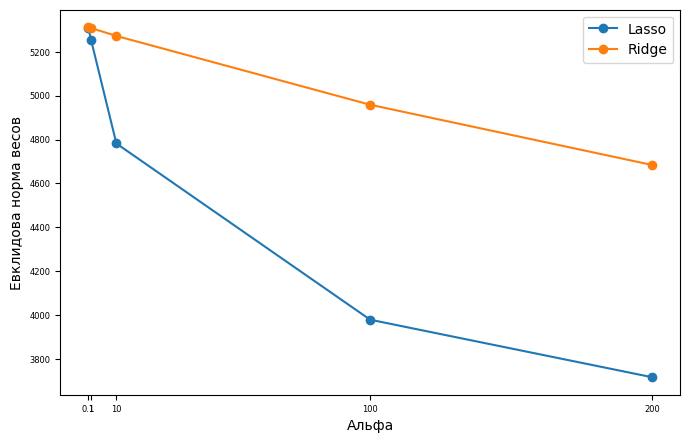

In [1213]:
lasso_norms = []
ridge_norms = []

for i in [0.1, 1, 10, 100, 200]:
    lasso = Lasso(i).fit(X_train, y_train)
    lasso_coef = np.linalg.norm(lasso.coef_)
    lasso_norms.append(lasso_coef)
    
    ridge = Ridge(i).fit(X_train, y_train)
    ridge_coef = np.linalg.norm(ridge.coef_)
    ridge_norms.append(ridge_coef)


    
plt.figure(figsize=(8, 5))

plt.plot([0.1, 1, 10, 100, 200], lasso_norms, marker='o', label='Lasso')
plt.plot([0.1, 1, 10, 100, 200], ridge_norms, marker='o', label='Ridge')

plt.xticks([0.1, 1, 10, 100, 200], [0.1, 1, 10, 100, 200], fontsize=6)
plt.yticks(fontsize=6)

plt.xlabel('Альфа')
plt.ylabel('Евклидова норма весов')

plt.legend();

Lasso-регрессию часто используют для отбора признаков потому что увелчение значения гиперпараметра даёт более значимые изменения в Евклидовой норме весов, следовательно лучше помогает понять, какие признаки являются несущественными для обучения модели.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [1276]:
from sklearn.linear_model import LassoCV

In [1340]:
lasso_cv = LassoCV(alphas=[alph for alph in range(1, 101)], cv=5, random_state=0).fit(X_train, y_train)

In [1324]:
print("LassoCV")
print(f"Train: {mean_squared_error(y_train, lasso_cv.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso_cv.predict(X_test))}")

LassoCV
Train: 1454340.077396044
Test: 1421096.2462586076


In [1342]:
lasso_cv.alphas_

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [1330]:
res_matrix = pd.DataFrame(lasso_cv.mse_path_)

In [1332]:
res_matrix

,0,1,2,3,4
0,1.714895e+06,1.567711e+06,1.676585e+06,1.531752e+06,1.620725e+06
1,1.712893e+06,1.565958e+06,1.674473e+06,1.529817e+06,1.618828e+06
2,1.710904e+06,1.564211e+06,1.672373e+06,1.527891e+06,1.616954e+06
3,1.708935e+06,1.562483e+06,1.670293e+06,1.525985e+06,1.615099e+06
4,1.706985e+06,1.560775e+06,1.668232e+06,1.524098e+06,1.613263e+06
...,...,...,...,...,...
95,1.559584e+06,1.415243e+06,1.504553e+06,1.354600e+06,1.463842e+06
96,1.559663e+06,1.414047e+06,1.503774e+06,1.351608e+06,1.462514e+06
97,1.560034e+06,1.413151e+06,1.503273e+06,1.348905e+06,1.461426e+06
98,1.560698e+06,1.412560e+06,1.503053e+06,1.346491e+06,1.460584e+06


In [1334]:
res_matrix.mean(axis=1)

0     1.622334e+06
1     1.620394e+06
2     1.618467e+06
3     1.616559e+06
4     1.614670e+06
          ...     
95    1.459564e+06
96    1.458321e+06
97    1.457358e+06
98    1.456677e+06
99    1.471773e+06
Length: 100, dtype: float64

In [1336]:
res_matrix.mean(axis=1).idxmin()

98

Значит alpha = 3 даёт наименьшую ошибку т.е. наибольшее качество модели(решил посмотреть значения от 1 до 100 для поиска наилучшего alpha)

### Если смотрим только на [0.1, 1, 10, 100, 200]

In [1314]:
lasso_cv_2 = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, random_state=0).fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1908731497.8560867, tolerance: 48309472.872808196
  model = cd_fast.enet_coordinate_descent_gram(


In [1316]:
print("LassoCV-2")
print(f"Train: {mean_squared_error(y_train, lasso_cv_2.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso_cv_2.predict(X_test))}")

LassoCV-2
Train: 1467699.331706013
Test: 1444108.140035274


In [1320]:
lasso_cv_2.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [1344]:
res_matrix_2 = pd.DataFrame(lasso_cv_2.mse_path_)

In [1346]:
res_matrix_2

,0,1,2,3,4
0,1.979941e+06,1.805572e+06,1.941879e+06,1.778941e+06,1.865888e+06
1,1.714899e+06,1.567722e+06,1.676588e+06,1.531762e+06,1.620717e+06
2,1.563423e+06,1.425753e+06,1.512610e+06,1.373785e+06,1.474116e+06
3,1.561638e+06,1.412272e+06,1.503145e+06,1.421824e+06,1.459985e+06
4,1.562633e+06,1.412186e+06,1.503521e+06,1.659276e+06,1.459565e+06


In [1348]:
res_matrix_2.mean(axis=1)

0    1.874444e+06
1    1.622338e+06
2    1.469937e+06
3    1.471773e+06
4    1.519436e+06
dtype: float64

In [1350]:
res_matrix_2.mean(axis=1).idxmin()

2

Значит alpha = 10 даёт наименьшую ошибку т.е. наибольшее качество модели

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [1378]:
lasso_optimal_1 = Lasso(3).fit(X_train, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso_optimal_1.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso_optimal_1.predict(X_test))}")

Lasso
Train: 1455040.1735273744
Test: 1423053.2117416896


In [1364]:
pd.DataFrame(lasso_optimal_1.coef_, index=X.columns).sort_values(0)

,0
x,-796.041879
color_J,-491.674664
color_I,-413.157871
color_H,-337.407880
color_G,-188.584959
depth,-108.766795
color_F,-93.303978
table,-62.702913
color_E,-56.633377
z,-20.929337


In [1358]:
lasso_optimal_2 = Lasso(10).fit(X_train, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso_optimal_2.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso_optimal_2.predict(X_test))}")

Lasso
Train: 1467699.331706013
Test: 1444108.140035274


In [1366]:
pd.DataFrame(lasso_optimal_2.coef_, index=X.columns).sort_values(0)

,0
x,-481.742164
color_J,-452.522655
color_I,-364.409456
color_H,-285.594001
color_G,-133.906896
depth,-82.518439
table,-51.812766
color_F,-43.659179
z,-27.687253
color_E,-5.980056


alpha = 3 оказалось лучше чем alpha = 10, при этом на каждой из обученных Lasso-регрессий наблюдается зануление y т.е. не имеет значения ширина алмаза, я считаю это логично т.к. более мелкие алмазы с более высоким каратом могут оказаться гораздо ценнее крупных с высоким каратом

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

Train: 1453732.189755485

Test: 1417773.4898166058

Данные, полученные в 3.7 при использовании обычной линейной регрессии

Train: 1455040.1735273744

Test: 1423053.2117416896

Данные, полученные при использовании обученной Lasso-линейной регрессии с alpha=3

В итоге получилось, что стандартная линейная регрессия оказалась чуть лучше Lasso-регрессии с alpha=3, возможно это произошло из-за зануления y и уменьшения весов для некоторых признаков, что в данном случае негативно сказалось на качестве модели. Но оишбка на Train и Test у обеих моделей почти такая же, в связи с этим можно сделать вывод, что модели приблизительно с одинаковой точностью делают предсказания. 